In [22]:
#import the mian libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Set the options to float numbers
pd.options.display.float_format = '{:,.2f}'.format #formating

In [23]:
#Read file
cartoons = pd.read_csv('cartoons.csv', index_col = 0 )
cartoons.sample(5) # A sample view


,cartoon_names,release_date,end_date,genre,imdb_score
120,Superboy,1988,"1,992.00",Adv-Fantas-SciFi,6.00
144,Elena of Avalor,2016,"2,020.00",An-Act-Adv,6.30
39,The Ri¢hie Ri¢h/Scooby-Doo Show,1980,"1,982.00",An-Short-Adv,6.30
171,Doc McStuffins,2012,"2,020.00",An-Fam-Fantas,6.60
11,The Bugs n' Daffy Show,1996,"1,999.00",An-Com-Fam,8.10


In [24]:
#A df resume
print(cartoons.shape)

print(cartoons.describe())

#We can view of df have 222 rows and 5 cols

#Check the nan values
print('\n')
for col in cartoons.columns:
    print("The feature {} have a {} null values".format(col,cartoons[col].isna().sum()))


(222, 5)
       release_date  end_date  imdb_score
count        222.00    177.00      222.00
mean       1,988.77  1,999.71        6.80
std           68.75     17.18        0.99
min        1,001.00  1,958.00        3.60
25%        1,980.00  1,990.00        6.30
50%        1,997.00  2,003.00        7.00
75%        2,006.75  2,013.00        7.50
max        2,017.00  2,022.00        8.60


The feature cartoon_names have a 0 null values
The feature release_date have a 0 null values
The feature end_date have a 45 null values
The feature genre have a 0 null values
The feature imdb_score have a 0 null values


In [26]:
#We notice that feature end_date have 45 null values. 
#We drop it. We only working with not nan values

cartoons.dropna(inplace=True)
cartoons.shape


(177, 5)

In [27]:
#What cartoon or cartoons have the imdb_score max?

cartoons[cartoons['imdb_score'] == cartoons['imdb_score'].max()]

,cartoon_names,release_date,end_date,genre,imdb_score
4,The Bugs Bunny Show,1960,"1,975.00",An-Com-Fam,8.60
116,Dragon Ball,1995,"2,003.00",An-Act-Adv,8.60
117,Dragon Ball: Doragon bôru,1986,"1,989.00",An-Act-Adv,8.60
181,Tumble Leaf,2013,"2,019.00",An-Short-Adv,8.60


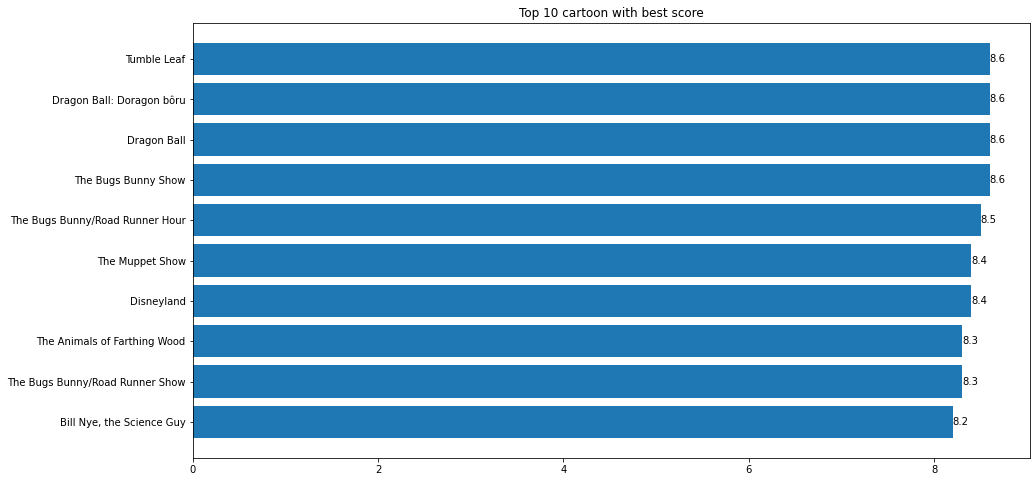

In [28]:
#%matplotlib notebook

#Top 10 cartoon whit best score

cartoons_10 = cartoons.sort_values(['imdb_score'],ascending =False )
cartoons_10 = cartoons_10.head(10)
cartoons_10.sort_values('imdb_score', ascending=True, inplace=True)
fig = plt.figure(figsize=(15,8))
graf = plt.barh(y = cartoons_10['cartoon_names'] , width=cartoons_10['imdb_score'])
plt.bar_label(graf)
plt.title('Top 10 cartoon with best score')
plt.show()


In [29]:
#We create a new column with the difference between release_date and end_date, i.e., duration

cartoons['duration'] = cartoons['end_date'] - cartoons['release_date']
cartoons


,cartoon_names,release_date,end_date,genre,imdb_score,duration
0,Yogi Bear,1961,"1,988.00",An-Com-Fam,6.60,27.00
1,The New Yogi Bear Show,1988,"1,990.00",An-Com-Fam,6.60,2.00
2,The Huckleberry Hound Show,1958,"1,962.00",An-Com-Fam,6.60,4.00
3,Popeye the Sailor,1960,"1,962.00",An-Adv-Com,7.10,2.00
4,The Bugs Bunny Show,1960,"1,975.00",An-Com-Fam,8.60,15.00
...,...,...,...,...,...,...
211,Lost in Oz,2015,"2,018.00",An-Fam-Fantas,7.50,3.00
212,Goldie and Bear,2015,"2,018.00",An-Fam-Fantas,6.10,3.00
216,Mickey and the Roadster Racers,2017,"2,021.00",An-Short-Adv,6.00,4.00
217,Inspecteur Gadget,1983,"1,986.00",An-Short-Adv,6.70,3.00


In [30]:
#Before to follow with the analysis. We should change the data type of feature end_date

cartoons['end_date']=cartoons['end_date'].astype('int64')
cartoons

,cartoon_names,release_date,end_date,genre,imdb_score,duration
0,Yogi Bear,1961,1988,An-Com-Fam,6.60,27.00
1,The New Yogi Bear Show,1988,1990,An-Com-Fam,6.60,2.00
2,The Huckleberry Hound Show,1958,1962,An-Com-Fam,6.60,4.00
3,Popeye the Sailor,1960,1962,An-Adv-Com,7.10,2.00
4,The Bugs Bunny Show,1960,1975,An-Com-Fam,8.60,15.00
...,...,...,...,...,...,...
211,Lost in Oz,2015,2018,An-Fam-Fantas,7.50,3.00
212,Goldie and Bear,2015,2018,An-Fam-Fantas,6.10,3.00
216,Mickey and the Roadster Racers,2017,2021,An-Short-Adv,6.00,4.00
217,Inspecteur Gadget,1983,1986,An-Short-Adv,6.70,3.00


In [31]:
#What is the serie with most duration?
cartoons[cartoons['duration'] == cartoons['duration'].max()]


,cartoon_names,release_date,end_date,genre,imdb_score,duration
169,Darkwing Duck,1001,1992,An-Act-Adv,7.60,991.00


In [32]:
#Uh.. we should to clean this data. Drop!

cartoons.drop(169,inplace=True)
cartoons[cartoons['duration'] == cartoons['duration'].max()]

,cartoon_names,release_date,end_date,genre,imdb_score,duration
52,Disneyland,1954,1997,Adv-Dram-Fam,8.40,43.00


In [33]:
#What is the series with the shortest duration?

cartoons[cartoons['duration'] == cartoons['duration'].min()]

,cartoon_names,release_date,end_date,genre,imdb_score,duration
20,The Atom Ant/Secret Squirrel Show,1967,1968,An-Com-Fam,7.00,1.00
37,The New Scooby-Doo Movies,1972,1973,An-Adv-Com,7.60,1.00
38,13 Ghosts of Scooby Doo,1985,1986,An-Adv-Com,7.30,1.00
41,"Scooby Doo, Where Are You!",1969,1970,An-Adv-Com,7.90,1.00
44,Top Cat,1961,1962,An-Com-Cr,7.10,1.00
54,The Dudley Do-Right Show,1969,1970,An-Adv-Com,6.70,1.00
59,George of the Jungle,2007,2008,An-Adv-Com,4.20,1.00
65,Little Lulu to chicchai nakama,1976,1977,An-Com-Fam,6.70,1.00
160,Ivor the Engine,1976,1977,An-Com-Fam,7.40,1.00
192,Goof Troop,1992,1993,An-Adv-Com,6.80,1.00


In [50]:
# How many series does a genre have? and average imdb_score

cartoons_summary = cartoons.groupby(['genre']).agg({'genre':['count'],'imdb_score':[np.average]})
cartoons_summary

,genre,imdb_score
,count,average
genre,,
Act-Adv-Cr,1,7.70
Adv-An-Fam,1,7.30
Adv-Com-Dram,1,6.70
Adv-Com-Fam,2,6.40
Adv-Dram-Fam,1,8.40
Adv-Fantas-SciFi,1,6.00
An-Act-Adv,15,6.93
An-Act-Com,1,6.40


In [52]:
#sort values with count

cartoons_summary.sort_values([('genre','count')], ascending=False)

,genre,imdb_score
,count,average
genre,,
An-Com-Fam,65,6.81
An-Adv-Com,28,6.69
An-Short-Adv,16,6.85
An-Act-Adv,15,6.93
An-Adv-Fam,11,6.43
An-Fam-Fantas,6,6.08
An-Short-Com,4,6.95
An-Adv-Dram,4,7.28


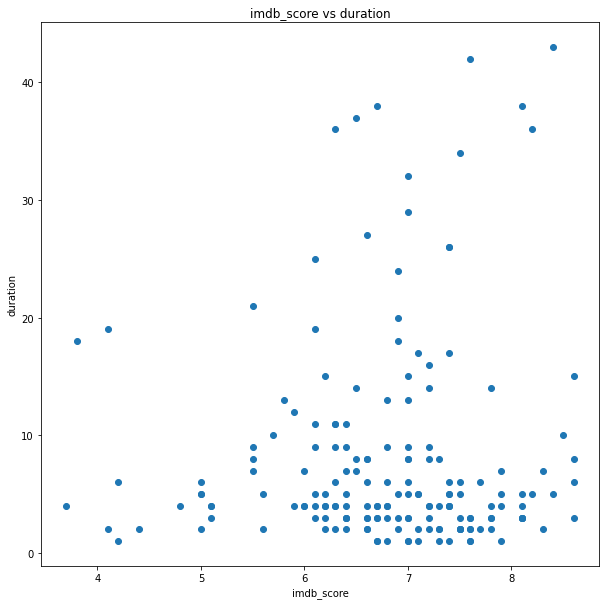

In [61]:
#Relation between duration and imdb_score

fig = plt.figure(figsize=(10,10))
plt.scatter(cartoons.imdb_score, cartoons.duration)
plt.ylabel('duration')
plt.xlabel('imdb_score')
plt.title('imdb_score vs duration')
plt.show()